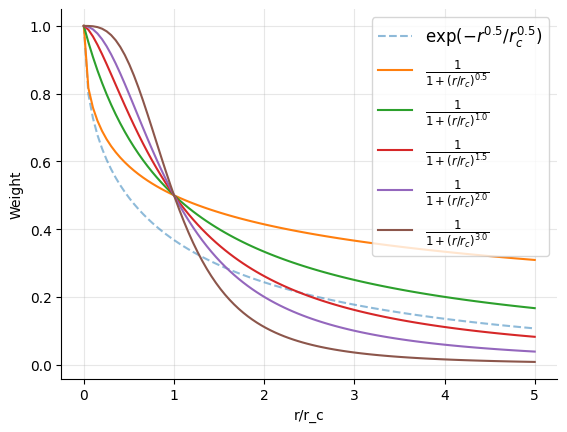

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

def weights(dists, radius, exp: float):
    return np.exp(-dists[:, np.newaxis]**exp / radius**exp)  # noqa: F821


def weights_torsten(dists, radius, exp):
    return 1 / (1 + (dists / radius)**exp)

dists = np.linspace(0, 5, 100)
radius = 1
# for exp in np.arange(0, 2, 0.2):
for exp in [0.5]:
    ax.plot(dists, weights(dists, radius, exp), label=f"$\\exp(-r^{{{exp:.1f}}}/r_c^{{{exp:.1f}}})$",  linestyle="--", alpha=0.5)


for exp in [0.5, 1, 1.5, 2., 3.]:
    ax.plot(dists, weights_torsten(dists, radius,exp), label=f"$\\frac{{1}}{{1+(r/r_c)^{{{exp:.1f}}}}}$")

ax.set_xlabel("r/r_c")
ax.grid(alpha=.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Weight")
ax.legend(fontsize="large")

/tmp/ipykernel_244796/4024878591.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-dists[:, np.newaxis]**exp / radius**exp)  # noqa: F821
/tmp/ipykernel_244796/4024878591.py:5: RuntimeWarning: invalid value encountered in divide
  return np.exp(-dists[:, np.newaxis]**exp / radius**exp)  # noqa: F821


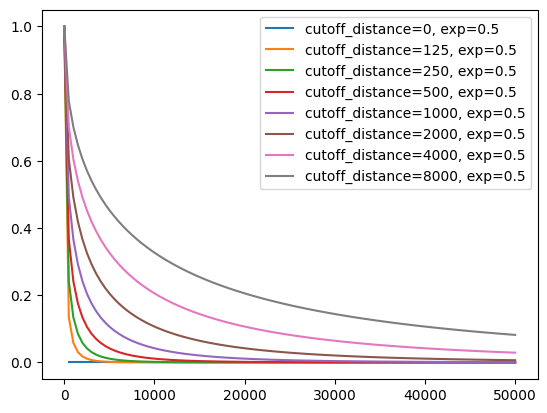

In [2]:
dists = np.linspace(0, 50000, 100)
exp = .5
# for exp in np.arange(0, 2, 0.2):
for radius in [0, 125, 250, 500, 1000, 2000, 4000, 8000]:
    plt.plot(dists, weights(dists, radius, exp), label=f"cutoff_distance={radius}, exp={exp}")

plt.legend()

In [1]:
KM = 1e3
radii = np.linspace(1*KM, 20*KM, 500)
dists = np.linspace(1*KM, 10*KM, 500)
fig = plt.figure()
ax = fig.gca()

w = weights(dists, radii, exp=0.5)
ax.imshow(w, aspect="auto", extent=(radii.min(), radii.max(), dists.min(), dists.max()), origin="lower")
ax.set_xlabel("Cutoff [km]")
ax.set_ylabel("Distance [km]")
ax.xaxis.set_major_formatter(lambda v, l: v/KM)
ax.yaxis.set_major_formatter(lambda v, l: v/KM)


ModuleNotFoundError: No module named 'matplotlib.backends'